In [7]:
import scanpy as sc
import multigrate as mtg
import anndata as ad
import scvi

In [4]:
adata = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/integrated_data/seaad_rosmap_integrated.h5ad')

In [3]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

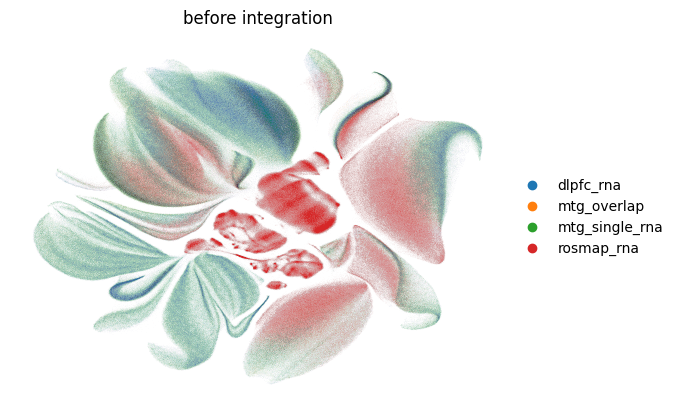

In [4]:
sc.pl.umap(adata, color=["sub_batch"], ncols=1, frameon=False, title = 'before integration')

In [5]:
adata

AnnData object with n_obs × n_vars = 4171637 × 7000
    obs: 'sample_id', 'Neurotypical reference', 'Donor_ID', 'Organism', 'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in mon

In [6]:
# Define the mapping dictionary
subclass_to_broad = {
    'L5 IT': 'Excitatory',
    'L6 IT': 'Excitatory',
    'Pvalb': 'Inhibitory',
    'Microglia-PVM': 'Microglia',
    'Astrocyte': 'Astrocytes',
    'L4 IT': 'Excitatory',
    'L2/3 IT': 'Excitatory',
    'L5/6 NP': 'Excitatory',
    'Sst': 'Inhibitory',
    'Vip': 'Inhibitory',
    'L6 IT Car3': 'Excitatory',
    'Lamp5': 'Inhibitory',
    'Oligodendrocyte': 'Oligodendrocytes',
    'Lamp5 Lhx6': 'Inhibitory',
    'L6 CT': 'Excitatory',
    'Chandelier': 'Inhibitory',
    'L6b': 'Excitatory',
    'OPC': 'OPCs',
    'Sncg': 'Inhibitory',
    'Endothelial': 'Endothelial',
    'Pax6': 'Inhibitory',  
    'VLMC': 'Endothelial',  
    'Sst Chodl': 'Inhibitory',
    'L5 ET': 'Excitatory'
}

# Map to new column
adata.obs['Subclass_aligned'] = adata.obs['Subclass'].map(subclass_to_broad)

In [14]:
adata.obs["subset"] = adata.obs["subset"].cat.rename_categories({"CUX2+": "Excitatory"})

In [17]:
adata.obs["subset"] = adata.obs["subset"].cat.reorder_categories(
    ['Astrocytes', 'Endothelial', 'Excitatory', 'Inhibitory', 'Microglia',
       'OPCs', 'Oligodendrocytes', 'nan']
)

In [18]:
adata.obs["subset"].cat.categories

Index(['Astrocytes', 'Endothelial', 'Excitatory', 'Inhibitory', 'Microglia',
       'OPCs', 'Oligodendrocytes', 'nan'],
      dtype='object')

In [8]:
sc.pp.neighbors(adata, use_rep="X_multigrate")
sc.tl.umap(adata)

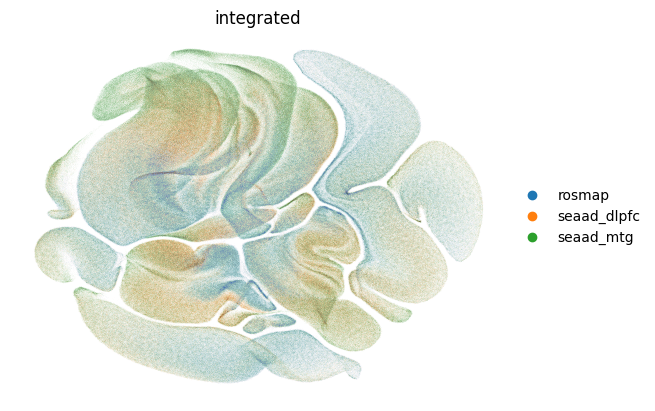

In [20]:
sc.pl.umap(adata, color=["batch"], title = "integrated", ncols=1, frameon=False)

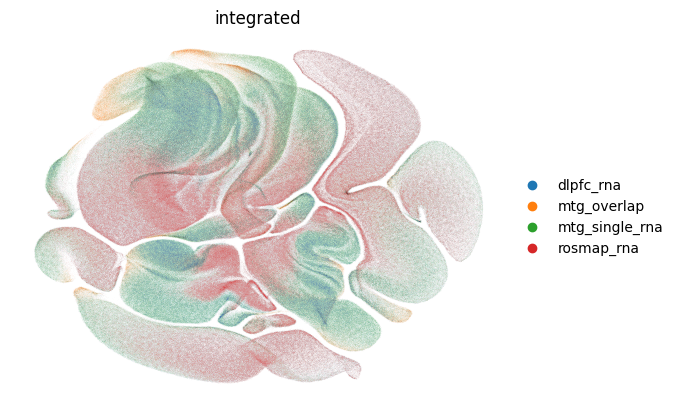

In [21]:
sc.pl.umap(adata, color=["sub_batch"], title = "integrated", ncols=1, frameon=False)

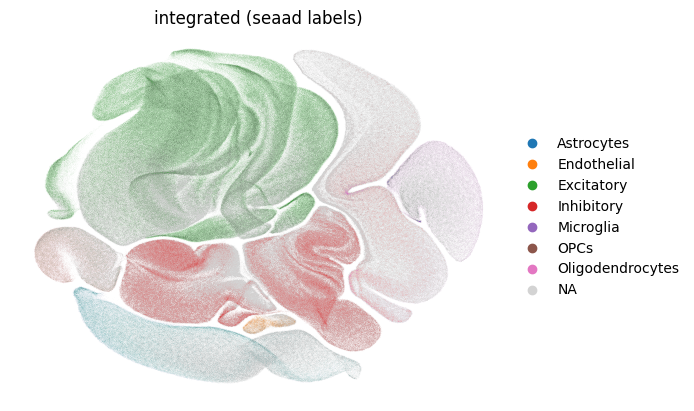

In [9]:
sc.pl.umap(adata, color=["Subclass_aligned"], title = "integrated (seaad labels)", ncols=1, frameon=False)

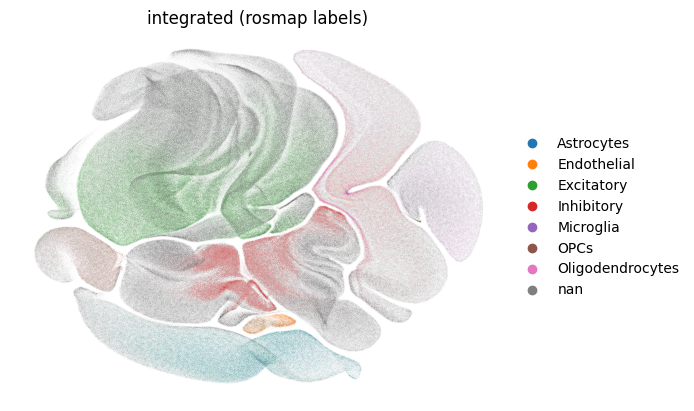

In [19]:
sc.pl.umap(adata, color=["subset"], title = "integrated (rosmap labels)", ncols=1, frameon=False)

In [2]:
adata = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/integrated_data/seaad_rosmap_integrated4.h5ad')

In [3]:
sc.pp.neighbors(adata, use_rep="X_multigrate")
sc.tl.umap(adata)

In [4]:
# Define the mapping dictionary
subclass_to_broad = {
    'L5 IT': 'Excitatory',
    'L6 IT': 'Excitatory',
    'Pvalb': 'Inhibitory',
    'Microglia-PVM': 'Microglia',
    'Astrocyte': 'Astrocytes',
    'L4 IT': 'Excitatory',
    'L2/3 IT': 'Excitatory',
    'L5/6 NP': 'Excitatory',
    'Sst': 'Inhibitory',
    'Vip': 'Inhibitory',
    'L6 IT Car3': 'Excitatory',
    'Lamp5': 'Inhibitory',
    'Oligodendrocyte': 'Oligodendrocytes',
    'Lamp5 Lhx6': 'Inhibitory',
    'L6 CT': 'Excitatory',
    'Chandelier': 'Inhibitory',
    'L6b': 'Excitatory',
    'OPC': 'OPCs',
    'Sncg': 'Inhibitory',
    'Endothelial': 'Endothelial',
    'Pax6': 'Inhibitory',  
    'VLMC': 'Endothelial',  
    'Sst Chodl': 'Inhibitory',
    'L5 ET': 'Excitatory'
}

# Map to new column
adata.obs['Subclass_aligned'] = adata.obs['Subclass'].map(subclass_to_broad)

In [5]:
adata.obs["subset"] = adata.obs["subset"].cat.rename_categories({"CUX2+": "Excitatory"})
adata.obs["subset"] = adata.obs["subset"].cat.reorder_categories(
    ['Astrocytes', 'Endothelial', 'Excitatory', 'Inhibitory', 'Microglia',
       'OPCs', 'Oligodendrocytes', 'nan']
)

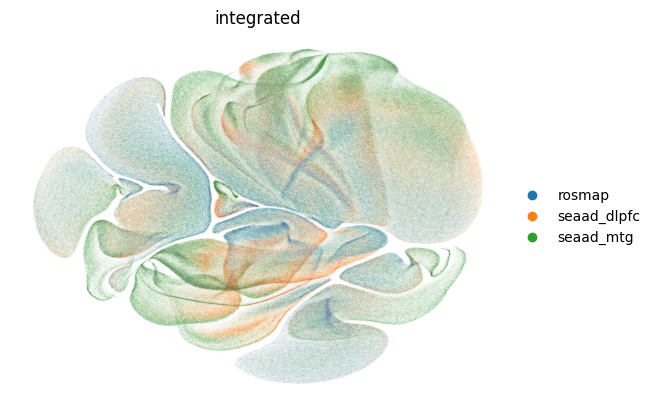

In [6]:
sc.pl.umap(adata, color=["batch"], title = "integrated", ncols=1, frameon=False)

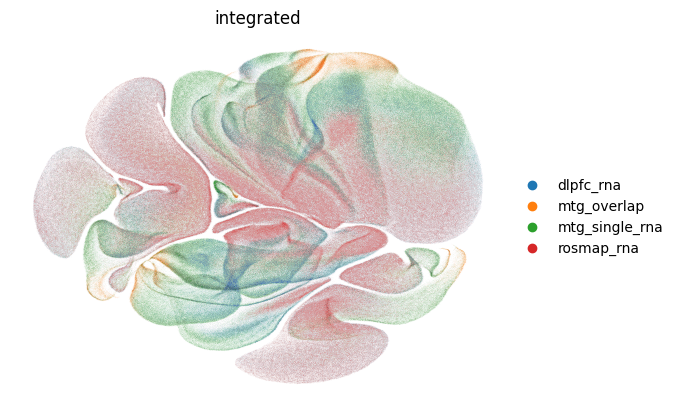

In [7]:
sc.pl.umap(adata, color=["sub_batch"], title = "integrated", ncols=1, frameon=False)

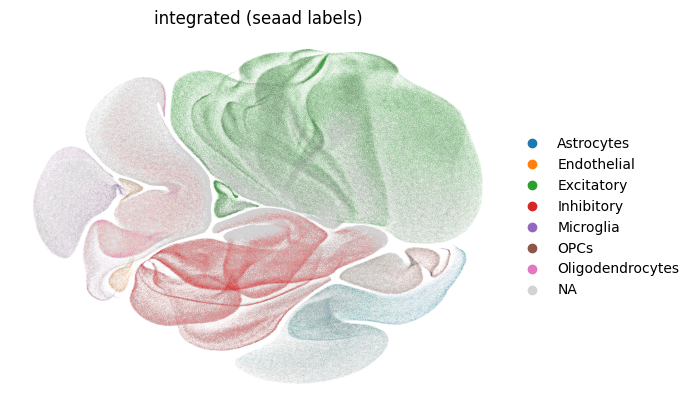

In [8]:
sc.pl.umap(adata, color=["Subclass_aligned"], title = "integrated (seaad labels)", ncols=1, frameon=False)

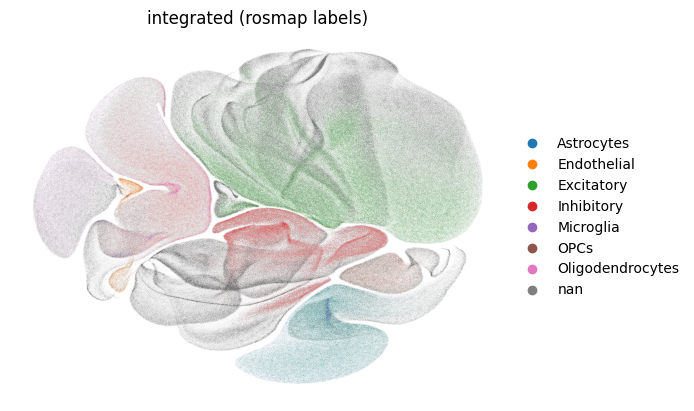

In [9]:
sc.pl.umap(adata, color=["subset"], title = "integrated (rosmap labels)", ncols=1, frameon=False)

In [2]:
adata = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/integrated_data/seaad_rosmap_integrated_rna.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 4171637 × 2000
    obs: 'sample_id', 'Neurotypical reference', 'Donor_ID', 'Organism', 'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in mon

In [4]:
# align cell type labels
subclass_to_broad = {
    'L5 IT': 'Excitatory',
    'L6 IT': 'Excitatory',
    'Pvalb': 'Inhibitory',
    'Microglia-PVM': 'Microglia',
    'Astrocyte': 'Astrocytes',
    'L4 IT': 'Excitatory',
    'L2/3 IT': 'Excitatory',
    'L5/6 NP': 'Excitatory',
    'Sst': 'Inhibitory',
    'Vip': 'Inhibitory',
    'L6 IT Car3': 'Excitatory',
    'Lamp5': 'Inhibitory',
    'Oligodendrocyte': 'Oligodendrocytes',
    'Lamp5 Lhx6': 'Inhibitory',
    'L6 CT': 'Excitatory',
    'Chandelier': 'Inhibitory',
    'L6b': 'Excitatory',
    'OPC': 'OPCs',
    'Sncg': 'Inhibitory',
    'Endothelial': 'Endothelial',
    'Pax6': 'Inhibitory',  
    'VLMC': 'Endothelial',  
    'Sst Chodl': 'Inhibitory',
    'L5 ET': 'Excitatory'
}

# Map to new column
adata.obs['Subclass_aligned'] = adata.obs['Subclass'].map(subclass_to_broad)
adata.obs["subset"] = adata.obs["subset"].cat.rename_categories({"CUX2+": "Excitatory"})
adata.obs['Subclass_aligned'] = adata.obs['Subclass_aligned'].fillna(adata.obs['subset'])

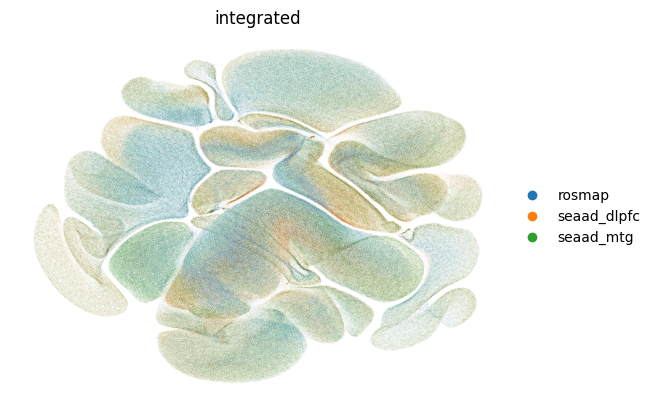

In [5]:
sc.pl.umap(adata, color=["batch"], title = "integrated", ncols=1, frameon=False)

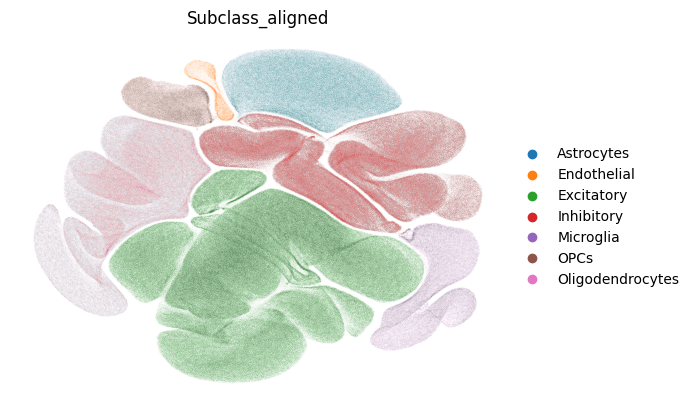

In [6]:
sc.pl.umap(adata, color=["Subclass_aligned"], title = "Subclass_aligned", ncols=1, frameon=False)

In [8]:
rna_mtg = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_MTG_RNAseq_final-nuclei.2024-02-13_count_hvg_aligned.h5ad')
rna_dlpfc = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/SEAAD/SEAAD_DLPFC_RNAseq_final-nuclei.2024-02-13_count_hvg_aligned.h5ad')
rna_sun = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_hvg_seaad_aligned.h5ad')

In [11]:
rna_mtg.layers['UMIs'].data

array([1., 1., 1., ..., 5., 2., 1.], dtype=float32)

In [12]:
rna_dlpfc.layers['UMIs'].data

array([ 1., 14.,  1., ...,  2.,  2.,  1.], dtype=float32)

In [13]:
rna_sun.X.data

array([1., 6., 1., ..., 2., 2., 1.])

In [2]:
rna_sun = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/rosmap/dlpfc2/raw_h5ad/all_hvg_seaad_aligned.h5ad')

In [3]:
rna_sun

AnnData object with n_obs × n_vars = 1625707 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'batch', 'individualID', 'DoubletFinder.score', 'subset', 'class', 'state', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'Donor_ID'